# [머신러닝]

In [4]:
import pandas as pd
import numpy as np
import os
os.listdir("/kaggle/input")

# 데이터 불러오기
raw = pd.read_csv("/kaggle/input/adp-book-data/hotel_bookings.csv")

## 1.	데이터 탐색하고 탐색 결과 제시


In [3]:
raw.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


- 독립변수들은 하나의 범주형 변수와 9개의 연속형 변수로 이루어져 있다. 

In [38]:
from collections import Counter
print(Counter(raw.deposit_type))
print(Counter(raw.is_canceled))

Counter({'No Deposit': 19138, 'Non Refund': 834, 'Refundable': 28})
Counter({0: 17600, 1: 2400})


- 독립변수에서 범주형 변수인 deposit_type는 세 개의 범주가 있고 종속변수는 바이너리형으로 0과 1 두 개의 범주로 이루어져 있다.
- 종속변수의 레이블별 건수가 7배 이상의 차이가 있다. (데이터불균형 문제)

In [16]:
raw.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


- 독립변수의 기초통계량을 보았을 때, 변수별로의 range에 차이가 있어 보여 스케일링이 필요하다.

<AxesSubplot:>

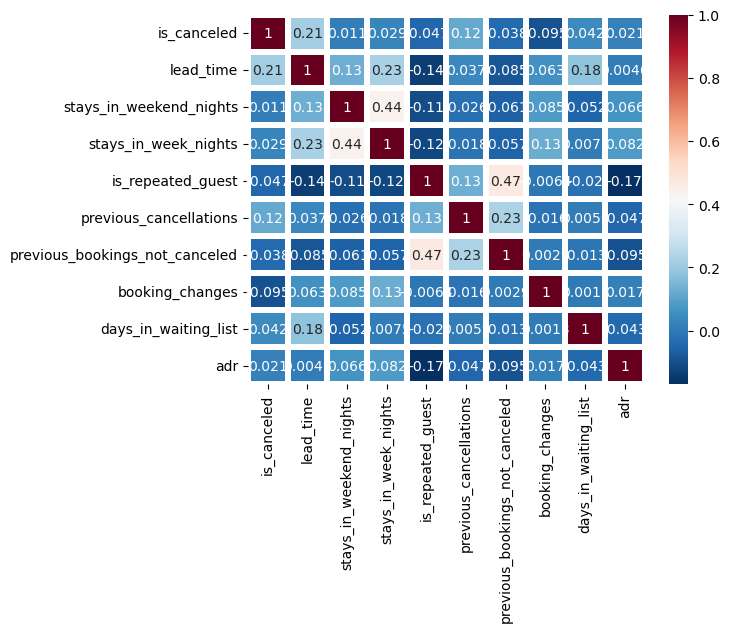

In [24]:
import seaborn as sns
data_cor = raw.corr(method = 'pearson')
sns.heatmap(data_cor,
           xticklabels = data_cor.columns,
           yticklabels = data_cor.columns,
           cmap= 'RdBu_r',
           annot = True,
           linewidth = 3)

- 연속형인 독립변수들의 상관관계를 보았을 때 상관성이 높은 변수는 보이지 않는다. 따라서, 다중공선성의 문제로 제외할 변수는 없는 것으로 보인다.

In [28]:
tmp = raw.drop(columns = ['deposit_type', 'is_canceled'])
tmp_melt = pd.melt(tmp, var_name = 'col', value_name = 'value')
tmp_melt

,col,value
0,lead_time,105.0
1,lead_time,303.0
2,lead_time,33.0
3,lead_time,48.0
4,lead_time,216.0
...,...,...
179995,adr,62.0
179996,adr,130.0
179997,adr,100.0
179998,adr,209.0


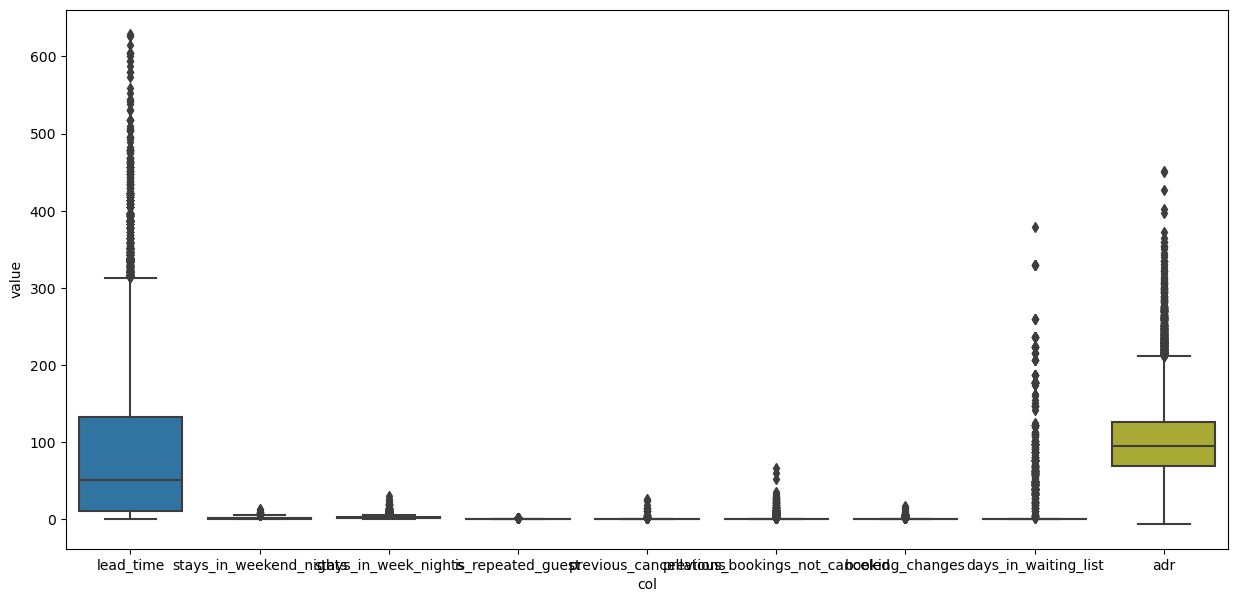

In [36]:
# 이상치 확인을 위한 boxplot
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 7))
sns.boxplot(x = 'col', y = 'value', data = tmp_melt)
# plt.xticks(range(len(tmp.columns)), tmp.columns)
plt.show()

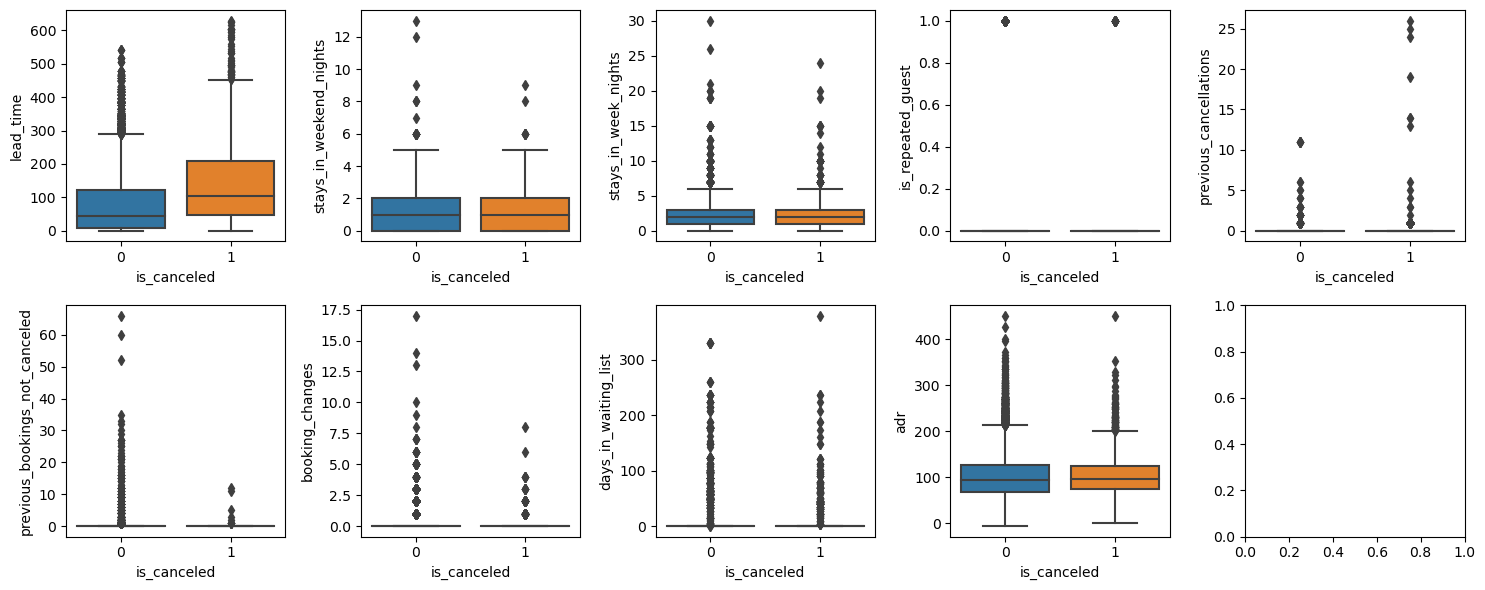

In [49]:
tmp = raw.drop(columns = ['deposit_type'])
x_col = list(tmp.columns)
x_col.remove('is_canceled')

n_row = 2
n_col = 5
fig, axs = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3))

for r in range(0, n_row):
    for c in range(0, n_col):
        i = r*n_col +c
        if i < len(x_col):
            sns.boxplot(x = 'is_canceled', y = x_col[i], data = tmp, ax = axs[r][c])
plt.tight_layout()
plt.show()

## 2.	결측치 탐색 후 대체 방법 및 근거 제시






In [20]:
print(raw.isna().sum()*100/len(raw))

is_canceled                       0.000
deposit_type                      0.000
lead_time                         0.025
stays_in_weekend_nights           0.000
stays_in_week_nights              0.000
is_repeated_guest                 1.790
previous_cancellations            0.000
previous_bookings_not_canceled    0.000
booking_changes                   0.000
days_in_waiting_list              0.000
adr                               5.315
dtype: float64


- lead_time, is_repeated_guest, adr 이 세 변수가 결측이 존재하고 있다. lead_time은 0.025%, is_repeated_guest은 1.79%,  adr은 5% 이상으로 adr이 가장 많은 결측치를 가지고 있으나 결측이 크게 심하진 않아서 삭제하기보다는 대체하는 것이 낫다.
- 결측치를 대체하는 방법에는 평균이나 중앙값 등 대표값을 단순 대체하는 방식이 있고 knn 알고리즘을 통해 이웃하는 데이터의 분포와 비슷한 값으로 대체하는 방법이 있다. 후자의 방법이 많이 쓰이고 그럴듯 하기 때문에 knn을 통해 대체한다.

In [125]:
from sklearn.impute import KNNImputer

raw1 = raw.drop(['deposit_type'], axis = 1).copy()
imputer = KNNImputer()

data_fill = imputer.fit_transform(raw1)
data_fill = pd.DataFrame(data_fill, columns = raw1.columns)

# 결측치 확인
print(data_fill.isna().sum())

data_fill['deposit_type'] = raw['deposit_type']

is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64


## 3.	데이터 질을 향상시킬 수 있는 방법 제안

- 변수별로의 range에 차이가 있어 보여 스케일링이 필요하다.
- 종속변수의 레이블별 건수가 7배 이상의 차이가 있다. 데이터불균형으로 레이블이 적은 데이터에 대해서 가중치를 적게 주기 때문에 원하는 모델을 만들기 어렵다. 따라서 불균형 처리를 해주면 데이터의 질을 높일 수 있다.
- 범주형 변수 같은 경우는 인코딩이 필요하다.

## 4.	데이터 불균형 시각화하여 식별, 불균형 판단 근거 작성

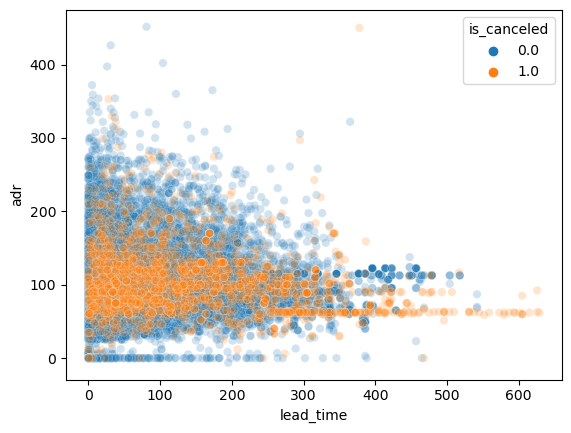

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns


sns.scatterplot(x = data_fill.lead_time, y = data_fill.adr, hue = data_fill.is_canceled, alpha = 0.2) # 

plt.show()

In [78]:
print(Counter(data_fill['is_canceled']))

Counter({0.0: 17600, 1.0: 2400})


- 위는 adr과 lead_time의 관계를 종속변수인 is_canceled 별로 색을 나눠 그린 그래프이다. is_canceled가 1인 데이터(주황색 점)보다 0인 데이터(파란색 점)가 훨씬 더 많아 레이블별 데이터 건수의 차이가 나는 것을 볼 수 있다. 또한, 종속변수의 레이블별 건수를 보면 7배 이상의 차이가 있다. 따라서, 데이터불균형 문제가 발생할 수 있어 처리가 필요하다.

## 5.	오버 샘플링 기법을 설명하고 비교한 뒤, 2개 기법을 선정하고 근거를 제시하시오.

- 오버샘플링은 소수의 레이블을 지닌 데이터를 다수 레이블을 지닌 데이터만큼 늘리는 방식이다.
- 오버 샘플링 기법에는 단순 오버샘플링과 SMOTE 방식이 있다.
- 단순오버샘플링은 소수의 레이블을 지닌 데이터를 단순 복제하여 다수의 레이블과의 비율을 맞추는 방법이다. 데이터를 단순 복제하기 때문에 분포는 변하지 않고 모델링시에 같은 비율로 가중치를 받을 수 있다. 그러나 오버피팅의 위험성을 지니고 있다.
- SMOTE 방식은 소수의 레이블을 지닌 데이터 관측값에 대해 이웃을 찾아 그 사이에 새로운 데이터를 생성하는 방법(KNN)이다. 위의 단순오버샘플링보다 오버피팅의 위험성이 적다.

## 6.	기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.

In [81]:
x_data1

,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,deposit_type
0,105.0,2.0,5.0,0.0,0.0,0.0,1.0,0.0,131.500,NaN
1,303.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,73.950,NaN
2,33.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,87.594,NaN
3,48.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.300,NaN
4,216.0,4.0,7.0,0.0,0.0,0.0,2.0,0.0,60.900,NaN
...,...,...,...,...,...,...,...,...,...,...
19995,89.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,62.000,NaN
19996,101.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,130.000,NaN
19997,277.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,100.000,NaN
19998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,209.000,NaN


In [141]:
x_col = list(data_fill.columns)
x_col.remove('is_canceled')

data_samp = data_fill.copy()
# 범주형 변수 숫자로 매핑
data_samp['deposit_type'] = data_samp['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})

# 1. 원데이터
x_data1 = data_fill[x_col].copy()
y_data1 = data_fill['is_canceled'].copy()


# 2. 단순오버샘플링
from imblearn.over_sampling import RandomOverSampler

over_sample = RandomOverSampler()
x_data2, y_data2 = over_sample.fit_resample(X = data_samp[x_col],  y = y_data1)

x_data2['deposit_type'] = x_data2['deposit_type'].map({0:'No Deposit', 1:'Refundable', 2:'Non Refund'})

# 3. smote
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = 'minority')
x_data3, y_data3 = smote_sample.fit_resample(X = data_samp[x_col], y = y_data1)

x_data3['deposit_type'] = x_data3['deposit_type'].map({0:'No Deposit', 1:'Refundable', 2:'Non Refund'})

print(Counter(y_data3))

Counter({0.0: 17600, 1.0: 17600})


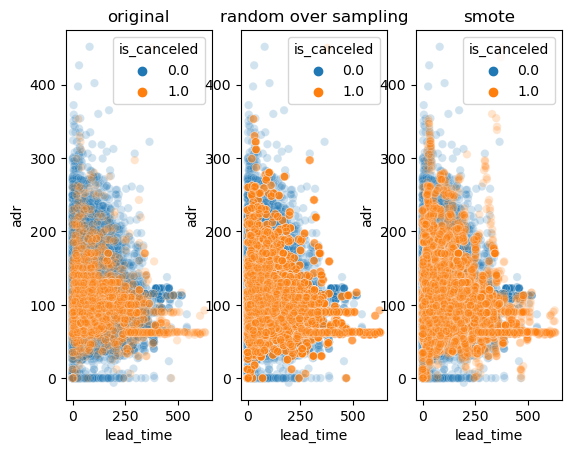

In [90]:
fig, axes = plt.subplots(nrows = 1, ncols = 3)

sns.scatterplot(x = x_data1.lead_time, y = x_data1.adr, hue = y_data1, alpha = 0.2, ax = axes[0])
sns.scatterplot(x = x_data2.lead_time, y = x_data2.adr, hue = y_data2, alpha = 0.2, ax = axes[1])
sns.scatterplot(x = x_data3.lead_time, y = x_data3.adr, hue = y_data3, alpha = 0.2, ax = axes[2])
axes[0].set_title('original')
axes[1].set_title('random over sampling')
axes[2].set_title('smote')
plt.show()

- 첫번째 그래프는 원본데이터이고 두번째 랜덤오버샘플링, 세번째는 smote로 불균형 처리 후의 시각화 결과이다.
- 첫번째에 비해 2, 3번째 그래프를 보면 is_canceled의 소수레이블이었던 1이 0만큼 늘어난 것을 볼 수 있다. 두번째는 같은 지점에 데이터가 생겨 점이 뚜렷하고 세번째 그래프는 레이블 1 데이터 근처에 점들이 생겼다는 것을 볼 수 있다.

## 7.	오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면 모델 하나를 선정하고, 그 이유를 설명하시오.

- 정확도 측면의 모델로는 xgboost를 선택한다. 그 이유는 과적합 규제 기능이 있어 강한 내구성을 지니고 있고 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘한다.
- 속도 측면의 모델로는 의사결정트리를 선택한다. 다른 기법에 이해 성능은 많이 떨어지지만 단순한 if-else 방식으로 모델이 쉽게 설명이 가능하고 속도가 빠른 장점이 있다.

## 8.	원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성.

In [104]:
enc_col = 'deposit_type'
scale_col = x_col.copy()
scale_col.remove('deposit_type')

In [153]:
def preprocessing(x_data, y_data, scale_col, enc_col):
    # 데이터 스케일링
    from sklearn.preprocessing import StandardScaler
    x_data_scale = StandardScaler().fit_transform(x_data[scale_col])

    # 원핫인코딩
    from sklearn.preprocessing import OneHotEncoder
    x_data_enc = OneHotEncoder(sparse = False).fit_transform(x_data[[enc_col]].values.reshape(-1, 1))

    # 합치기
    x_data = np.concatenate([x_data_scale, x_data_enc], axis = 1)

    y_data_r = y_data.values.ravel()

    # 데이터 분할
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_r, test_size = 0.2, random_state = 123)

    return x_train, x_test, y_train, y_test

In [154]:
# 원데이터
x_train1, x_test1, y_train1, y_test1 = preprocessing(x_data1, y_data1, scale_col, enc_col)

# 랜덤오버샘플링
x_train2, x_test2, y_train2, y_test2 = preprocessing(x_data2, y_data2, scale_col, enc_col)

# smote
x_train3, x_test3, y_train3, y_test3 = preprocessing(x_data3, y_data3, scale_col, enc_col)

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_curve, auc

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

xgb = XGBClassifier(n_estimators = 100)
dt = DecisionTreeClassifier()

xgb_grid = [
    {'max_depth' : [2,4,6,8]
     
     }
]

dt_grid = [
    {'max_depth' : [2,4,6,8],
     'min_samples_split' : [2, 4, 6, 8]
     }
]

In [165]:
def fn_model(model, grid, x_train, x_test, y_train, y_test):
    # 모델 생성
    m = GridSearchCV(model, param_grid = grid, cv = 5)
    m.fit(x_train, y_train)
    
    # 예측
    y_pred = m.predict(x_test)
    
    # 평가
    score = accuracy_score(y_pred, y_test)
    
    print('정확도 : ', score)

In [169]:
# 원데이터
fn_model(xgb, xgb_grid, x_train1, x_test1, y_train1, y_test1)
fn_model(dt, dt_grid, x_train1, x_test1, y_train1, y_test1)

# 랜덤오버샘플링
fn_model(xgb, xgb_grid, x_train2, x_test2, y_train2, y_test2)
fn_model(dt, dt_grid, x_train2, x_test2, y_train2, y_test2)

# smote
fn_model(xgb, xgb_grid, x_train3, x_test3, y_train3, y_test3)
fn_model(dt, dt_grid, x_train3, x_test3, y_train3, y_test3)

정확도 :  0.9225
정확도 :  0.92225
정확도 :  0.9048295454545454
정확도 :  0.7225852272727272
정확도 :  0.9471590909090909
정확도 :  0.821590909090909


- 모델을 돌리기 전 연속형데이터는 스케일링을, 범주형데이터는 원핫인코딩을 수행하였다. 그 후, 앞서 선택한 xgb와 의사결정나무 모델링을 수행하였는데 과적합을 피하기 위해 교차 검증을 통한 Grid Search 방식으로 모델링을 하였다. 또한 각각의 데이터를 train와 test로 나눠 train로 학습하고 test로 분류 정확도를 평가하여 확인하였다. 그 결과는 다음과 같다.
    - 원데이터를 사용한 xgboost 정확도 : 0.9225
    - 원데이터를 사용한 의사결정나무 정확도 : 0.92225
    - 랜덤오버샘플링 데이터를 사용한 xgboost 정확도 : 0.9048
    - 랜덤오버샘플링 데이터를 사용한 의사결정나무 정확도 : 0.7225
    - smote 데이터를 사용한 xgboost 정확도 : 0.94715
    - smote 데이터를 사용한 의사결정나무 정확도 : 0.8215

- 모델측면으로는 전체적으로 xgboost >의사결정나무 순으로 정확도가 높다. 오버 샘플링의 기법 측면으로는 smote > 원데이터 > 랜덤오버샘플링 순으로 정확도가 높다. 가장 정확도가 높았던 조합은 smote 기법과 xgboost 모델의 조합이고 정확도가 가장 낮은 조합은 랜덤오버샘플링 기법과 의사결정나무 모델의 조합이다.
- smote 기법으로 오버샘플링을 했을 때 정보량이 늘어나서 원데이터보다 정확도가 높은 것을 볼 수 있다.

# [통계분석]

## 1.	공장에서 시제품의 농도 60%라고 주장, 샘플 10개를 뽑음. 유의수준 5%에서 검정

### (1) 연구가설, 귀무가설을 작성하시오.

- Ho : 시제품의 농도는 60이다.
- H1 : 시제품의 농도는 60이 아니다.
- 중심극한 정리를 적용하기 표본의 크기가 작으므로 비모수 분석의 부호검정을 실시

### (2) 유효한 샘플의 수를 계산

- 유효한 샘플의 수는 최소 표본크기를 계산하여 설정가능.
- 최소 표본크기의 계산은 오차한계와 신뢰구간이 주어졌을때 샘플로부터 추정한 표준편차를 사용해 표본의 크기를 구할 수 있다.
- 오차한계를 5, 신뢰수준을 0.05로 설정

In [226]:
x = [52, 50, 62, 75, 26, 45, 62, 35,  57, 14]

moe = 5 # 오차한계
a = 0.05 # 신뢰수준
std = np.std(x)
print(std)
(stats.t.ppf(q = 0.05, df = 9)*std/5)**2

17.434448657758008


40.85590828532381

- 유효한 샘플의 수는 40이상이다.

### (3) 검정통계량을 구하고 연구가설 채택여부

In [228]:
from scipy import stats
stats.wilcoxon(pd.Series(x) - 60)

WilcoxonResult(statistic=9.5, pvalue=0.064453125)

- 윌콕슨의 부호검정은 모집단이 정규성을 띄지 못할때 사용하는 검정으로 비교 대상들 사이의 차이를 부호와 크기에 대한 정보로 바꾸어 분포를 비교한다.
- 검정결과 pvalue가 0.05보다 크므로 귀무가설을 기각하지 못한다. 따라서 시제품의 농도는 60이다.

In [173]:
# 틀린 풀이(건수가 작아서 비모수로 해야함)

# import scipy.stats as stats
# from scipy.stats import shapiro

# mu = 60
# shapiro(x)
# # p_value가 0.05보다 크므로 '데이터가 정규분포를 따른다'라는 귀무가설을 기각하지 못한다. 따라서 정규분포를 따르므로 t-test 수행한다.
# stats.ttest_1samp(x, popmean = mu)
# # 검정통계량은 -2.0992이고 pvalue는 0.06으로 0.05보다 크므로 귀무가설을 기각하지 못한다. 따라서 연구가설을 채택하지 못하므로 시제품의 농도는 60이다.

ShapiroResult(statistic=0.965764582157135, pvalue=0.849041759967804)

## 2.	코로나 시계열 데이터로 다음을 수행


In [229]:
# 데이터 불러오기
raw = pd.read_csv("/kaggle/input/adp-book-data/19.csv")
raw.head()

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [231]:
raw.shape

(785, 26)

### (1) acf를 사용해서 distancd를 계산하시오.

In [233]:
data = raw.copy()
data = data.drop(['날짜'], axis = 1)

import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess

def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags = n_lags)

n_lags = 785 # 계산할 ACF 최대 라그 수를 지정
lag_arr = np.repeat(n_lags, data.shape[1]) # ACF 최대 라그 수를 각 컬럼별로 반복하여 라그 수를 지정합니다.
acf_list = list(map(acf, data.T.to_numpy(), lag_arr)) # 각 구별로 acf를 구함
acf_df = pd.DataFrame(acf_list).T
acf_df.columns = data.columns

acf_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.017175,-0.017212,-0.017232,-0.015171,-0.015231,-0.016054,-0.016019,-0.015739,-0.015857,-0.015638,...,-0.015340,-0.016170,-0.015477,-0.016447,-0.016157,-0.016273,-0.016151,-0.016955,-0.015392,-0.015228
781,-0.013889,-0.013915,-0.013929,-0.012270,-0.012320,-0.012982,-0.012970,-0.012738,-0.012831,-0.012644,...,-0.012420,-0.013083,-0.012523,-0.013303,-0.013069,-0.013163,-0.013059,-0.013717,-0.012449,-0.012334
782,-0.010519,-0.010542,-0.010562,-0.009290,-0.009335,-0.009836,-0.009829,-0.009646,-0.009726,-0.009589,...,-0.009417,-0.009909,-0.009490,-0.010075,-0.009899,-0.009972,-0.009907,-0.010415,-0.009434,-0.009360
783,-0.007108,-0.007135,-0.007144,-0.006282,-0.006309,-0.006655,-0.006652,-0.006522,-0.006586,-0.006479,...,-0.006374,-0.006704,-0.006427,-0.006808,-0.006687,-0.006742,-0.006686,-0.007044,-0.006380,-0.006323


In [238]:
# data = raw.copy()
# data.날짜 =pd.to_datetime(raw.날짜, format = "%Y-%m-%d")
# data.set_index('날짜', inplace = True)
# data.head()

### (2) 계층적 군집분석을 위해 덴드로그램을 작성

In [241]:
# 위 결과를 이어받아 수행
data2_t = acf_df.T
acf_df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
종로구,1.0,0.965624,0.932172,0.899077,0.865542,0.832363,0.794512,0.761958,0.729971,0.699409,...,-0.032352,-0.029599,-0.026741,-0.023738,-0.020635,-0.017175,-0.013889,-0.010519,-0.007108,-0.003608
중구,1.0,0.966025,0.932933,0.900435,0.867391,0.834610,0.796898,0.764614,0.733020,0.702617,...,-0.032460,-0.029706,-0.026830,-0.023818,-0.020699,-0.017212,-0.013915,-0.010542,-0.007135,-0.003619
용산구,1.0,0.965807,0.932148,0.899075,0.865682,0.832234,0.798381,0.765454,0.733336,0.702647,...,-0.032290,-0.029516,-0.026637,-0.023616,-0.020484,-0.017232,-0.013929,-0.010562,-0.007144,-0.003624
성동구,1.0,0.964843,0.930035,0.895739,0.860691,0.826010,0.789577,0.755252,0.721447,0.689063,...,-0.028496,-0.026046,-0.023505,-0.020839,-0.018086,-0.015171,-0.012270,-0.009290,-0.006282,-0.003182
광진구,1.0,0.965118,0.930705,0.896734,0.862274,0.828063,0.793461,0.759914,0.727410,0.696133,...,-0.028500,-0.026029,-0.023499,-0.020853,-0.018098,-0.015231,-0.012320,-0.009335,-0.006309,-0.003199


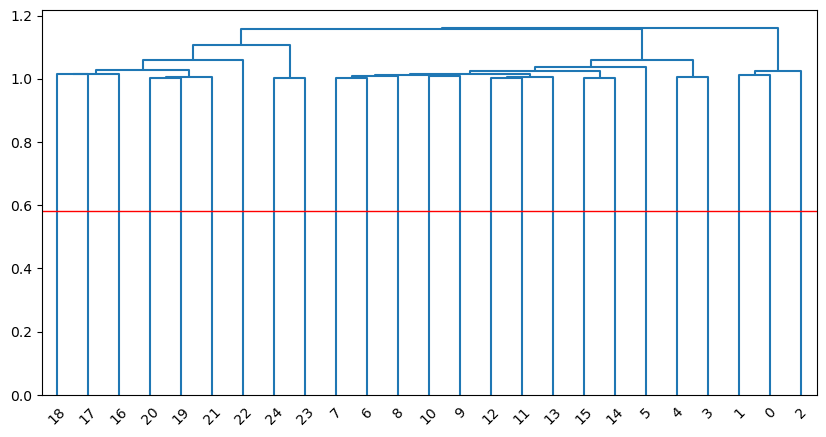

In [243]:
data2_t = data2_t.reset_index(drop = True).reset_index()

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

lst_label = list(data2_t.index)
# 최단 연결법
single = linkage(data2_t, metric = 'euclidean', method = 'single')
cutoff = 0.5 * max(single[:, 2])
# 덴드로그램 그리기
plt.figure(figsize = (10, 5))

dendrogram(single,
          orientation = 'top',
          labels = lst_label,
          distance_sort = 'descending',
          color_threshold = cutoff,
          show_leaf_counts = True)

plt.axhline(y = cutoff, color = 'r', linewidth = 1)
plt.show()

In [197]:
# # 데이터 재구조화
# df_melt = pd.melt(data2, id_vars = 'index', value_vars = melt_col, var_name = 'col', value_name = 'value')
# df_melt

,index,col,value
0,0,종로구,37261
1,1,종로구,36216
2,2,종로구,35276
3,3,종로구,34879
4,4,종로구,34061
...,...,...,...
19620,780,강동구,0
19621,781,강동구,0
19622,782,강동구,0
19623,783,강동구,0


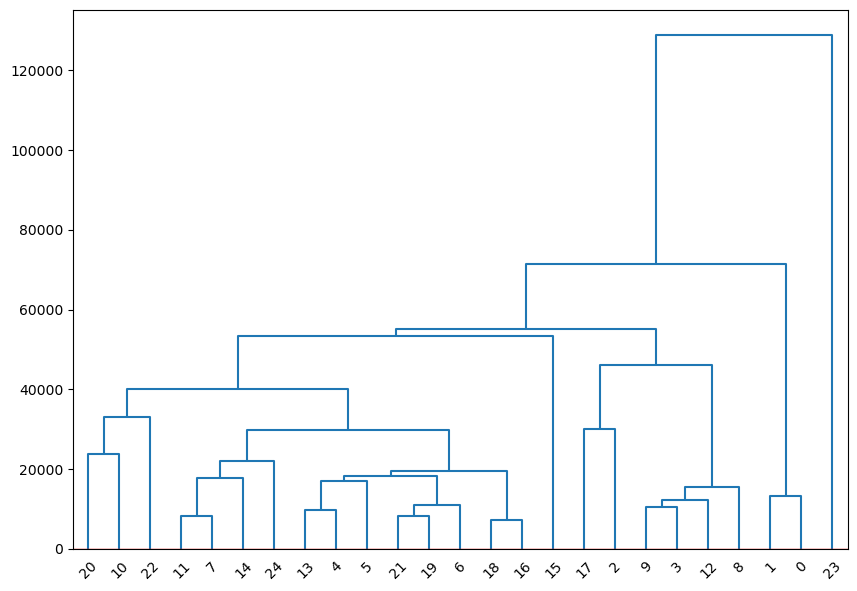

In [209]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# from matplotlib import pyplot as plt

# lst_label = list(data2_t.index)
# # 최단 연결법
# single = linkage(data2_t.iloc[:, 1::], metric = 'euclidean', method = 'single')

# # 덴드로그램 그리기
# plt.figure(figsize = (10, 7))

# dendrogram(single,
#           orientation = 'top',
#           labels = lst_label,
#           distance_sort = 'descending',
#           color_threshold = 10,
#           show_leaf_counts = True)

# plt.axhline(y = 10, color = 'r', linewidth = 1)
# plt.show()

## 3.	사회과학, 자연과학, 공학 세 개의 학과의 평점 조사표를 보고 학과와 성적이 관계가 있는지 검정
### (1) 연구가설, 귀무가설을 작성


- H0 : 학과와 평점에 독립이다.
- H1 : 학과와 평점에 독립이 아니다.


### (2) 학과와 성적이 독립일 때 기대값을 구하라.

In [219]:
a = [16, 30, 12]
b = [12, 20, 3]
c = [18, 13, 14]
df = pd.DataFrame({'사회과학':a, '자연과학':b, '공학' : c},
                 index = ['3.5~4.5', '2.5~3.5', '1.5~2.5'])
df = df.reset_index()
df = df.set_index('index')
df

,사회과학,자연과학,공학
index,,,
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


In [220]:
from scipy.stats import chi2_contingency
chi, p, ndf, expect = chi2_contingency(df)


In [221]:
print('기대값', expect)

기대값 [[19.33333333 11.66666667 15.        ]
 [26.47826087 15.97826087 20.54347826]
 [12.1884058   7.35507246  9.45652174]]



### (3) 검정통계량 구하고 연구가설 채택여부를 작성하시오.

In [222]:
print('검정통계량 : ', chi)
print('pvalue : ', p)

검정통계량 :  10.199441509990177
pvalue :  0.03719883770303157


- 검정통계량은 10.199이고 pvalue가 0.05보다 작으므로 학과와 성적은 독립이 아니라는 대립가설을 채택한다. 즉, 성적과 학과 간에는 관련성이 있다.